In [10]:
import osmnx as ox
%matplotlib inline
import ogr
import shapely
from shapely.geometry import *
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
driver=ogr.GetDriverByName('OSM')
data = driver.Open('E:/manipal.osm')
layer = data.GetLayer('points')
features=[x for x in layer]

In [12]:
g=ox.core.graph_from_file('E:/manipal.osm', bidirectional=False, simplify=True, retain_all=False, name='unnamed')

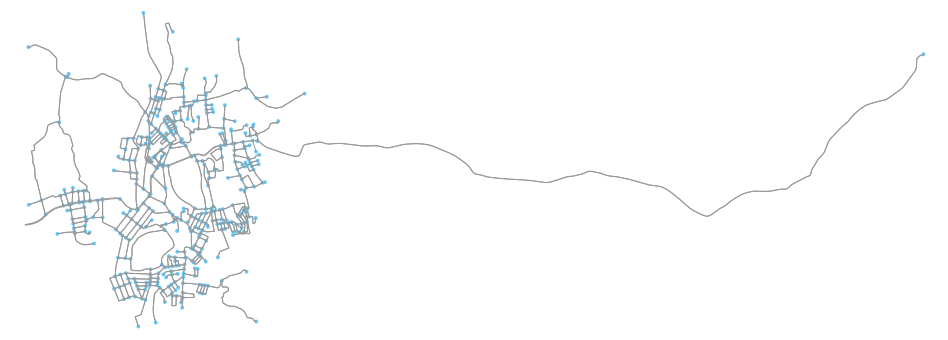

In [13]:
fig, ax = ox.plot_graph(g)

In [25]:
data2=[]
count=0
for feature in features:
    data=feature.ExportToJson(as_object=True)
    if 'type' in data and data['type']=='Feature':
        name=data['properties']['name']
        coords=data['geometry']['coordinates']
        data2.append([Point(coords[0],coords[1]),name,count])
        count+=1
gdf=gpd.GeoDataFrame(data2,columns=['geometry','name','count'],crs={'init': 'epsg:4326'})

E:\anaconda\envs\rai\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [26]:
print(gdf)

                     geometry                          name  count
0   POINT (74.78937 13.35348)                  KMC Hospital      0
1   POINT (74.78703 13.35197)                       Manipal      1
2   POINT (74.79117 13.34482)              Venugopal Temple      2
3   POINT (74.78531 13.33998)     Prasanna Ganapathy Temple      3
4   POINT (74.78705 13.35216)            Manipal Taxi Stand      4
..                        ...                           ...    ...
95  POINT (74.79665 13.34713)                    18th Block     95
96  POINT (74.78937 13.35361)  Kasturba Hospital Blood Bank     96
97  POINT (74.79009 13.35381)      Kasturba Hospital, Udupi     97
98  POINT (74.79643 13.34535)              MIT Food Court 2     98
99  POINT (74.79389 13.34577)                       Block 7     99

[100 rows x 3 columns]


In [24]:
gdf.tail()

,geometry,name,count
95,POINT (74.79665 13.34713),18th Block,95
96,POINT (74.78937 13.35361),Kasturba Hospital Blood Bank,96
97,POINT (74.79009 13.35381),"Kasturba Hospital, Udupi",97
98,POINT (74.79643 13.34535),MIT Food Court 2,98
99,POINT (74.79389 13.34577),Block 7,99
